## Case A. BBDM Project

In [97]:
# Importing the Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot

In [99]:
# load the dataset
df = pd.read_excel('Data from both TBM projects.xlsx', sheet_name='BBDMP')

In [101]:
# Display the first few rows to explore the dataset
df.head()

Chainage  Ring No.  CRS      PRchd  Torque  Thrust  RMR RMC  Lithology  \
0     150.7         1  3.0  10.333333   516.5  4013.5   20   V  SIST, MST   
1     152.1         2  3.0  10.333333   516.5  4013.5   20   V  SIST, MST   
2     153.5         3  3.0   9.166667   516.5  4013.5   20   V  SIST, MST   
3     154.9         4  3.0   9.166667   516.5  4013.5   20   V  SIST, MST   
4     156.3         5  3.0   9.166667   516.5  4013.5   20   V  SIST, MST   

  Formation Weathering Rock Strength  PRnet  
0        LS   MW to HW          Weak   31.0  
1        LS   MW to HW          Weak   31.0  
2        LS   MW to HW          Weak   27.5  
3        LS   MW to HW          Weak   27.5  
4        LS   MW to HW          Weak   27.5

## Step 1: General information about the dataset

In [103]:
# Step 1: General information about the dataset
# Data types, non-null counts
print("General Information:")
print(df.info())

General Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8614 entries, 0 to 8613
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Chainage       8614 non-null   float64
 1   Ring No.       8614 non-null   int64  
 2   CRS            8614 non-null   float64
 3   PRchd          8614 non-null   float64
 4   Torque         8614 non-null   float64
 5   Thrust         8614 non-null   float64
 6   RMR            8614 non-null   int64  
 7   RMC            8614 non-null   object 
 8   Lithology      8614 non-null   object 
 9   Formation      8614 non-null   object 
 10  Weathering     8614 non-null   object 
 11  Rock Strength  8614 non-null   object 
 12  PRnet          8614 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 875.0+ KB
None


In [105]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Chainage         0
Ring No.         0
CRS              0
PRchd            0
Torque           0
Thrust           0
RMR              0
RMC              0
Lithology        0
Formation        0
Weathering       0
Rock Strength    0
PRnet            0
dtype: int64


In [107]:
# Unique values per column
print("\nUnique Values per Column:")
print(df.nunique())


Unique Values per Column:
Chainage         8614
Ring No.         8614
CRS                58
PRchd             271
Torque            374
Thrust           2404
RMR                45
RMC                 3
Lithology          10
Formation           6
Weathering          5
Rock Strength       3
PRnet             713
dtype: int64


## Step 2: Descriptive statistics

In [109]:
df.describe().round(2)

Chainage  Ring No.      CRS    PRchd   Torque    Thrust      RMR  \
count   8614.00   8614.00  8614.00  8614.00  8614.00   8614.00  8614.00   
mean    6179.80   4307.50     7.50     9.13   321.14   5020.10    38.48   
std     3481.51   2486.79     0.92     2.11    58.95   1048.18     7.29   
min      150.70      1.00     2.60     1.70   142.00   2059.00    14.00   
25%     3165.25   2154.25     7.00     7.60   276.00   4265.50    35.00   
50%     6179.80   4307.50     8.00     9.00   320.00   5000.00    38.00   
75%     9194.35   6460.75     8.00    10.50   360.00   5783.00    42.00   
max    12208.90   8614.00     9.50    17.10   546.00  11800.00    60.00   

         PRnet  
count  8614.00  
mean     67.78  
std      15.53  
min      13.00  
25%      56.00  
50%      66.00  
75%      79.10  
max     128.50

## Step 3: Pearson Correlation Analysis

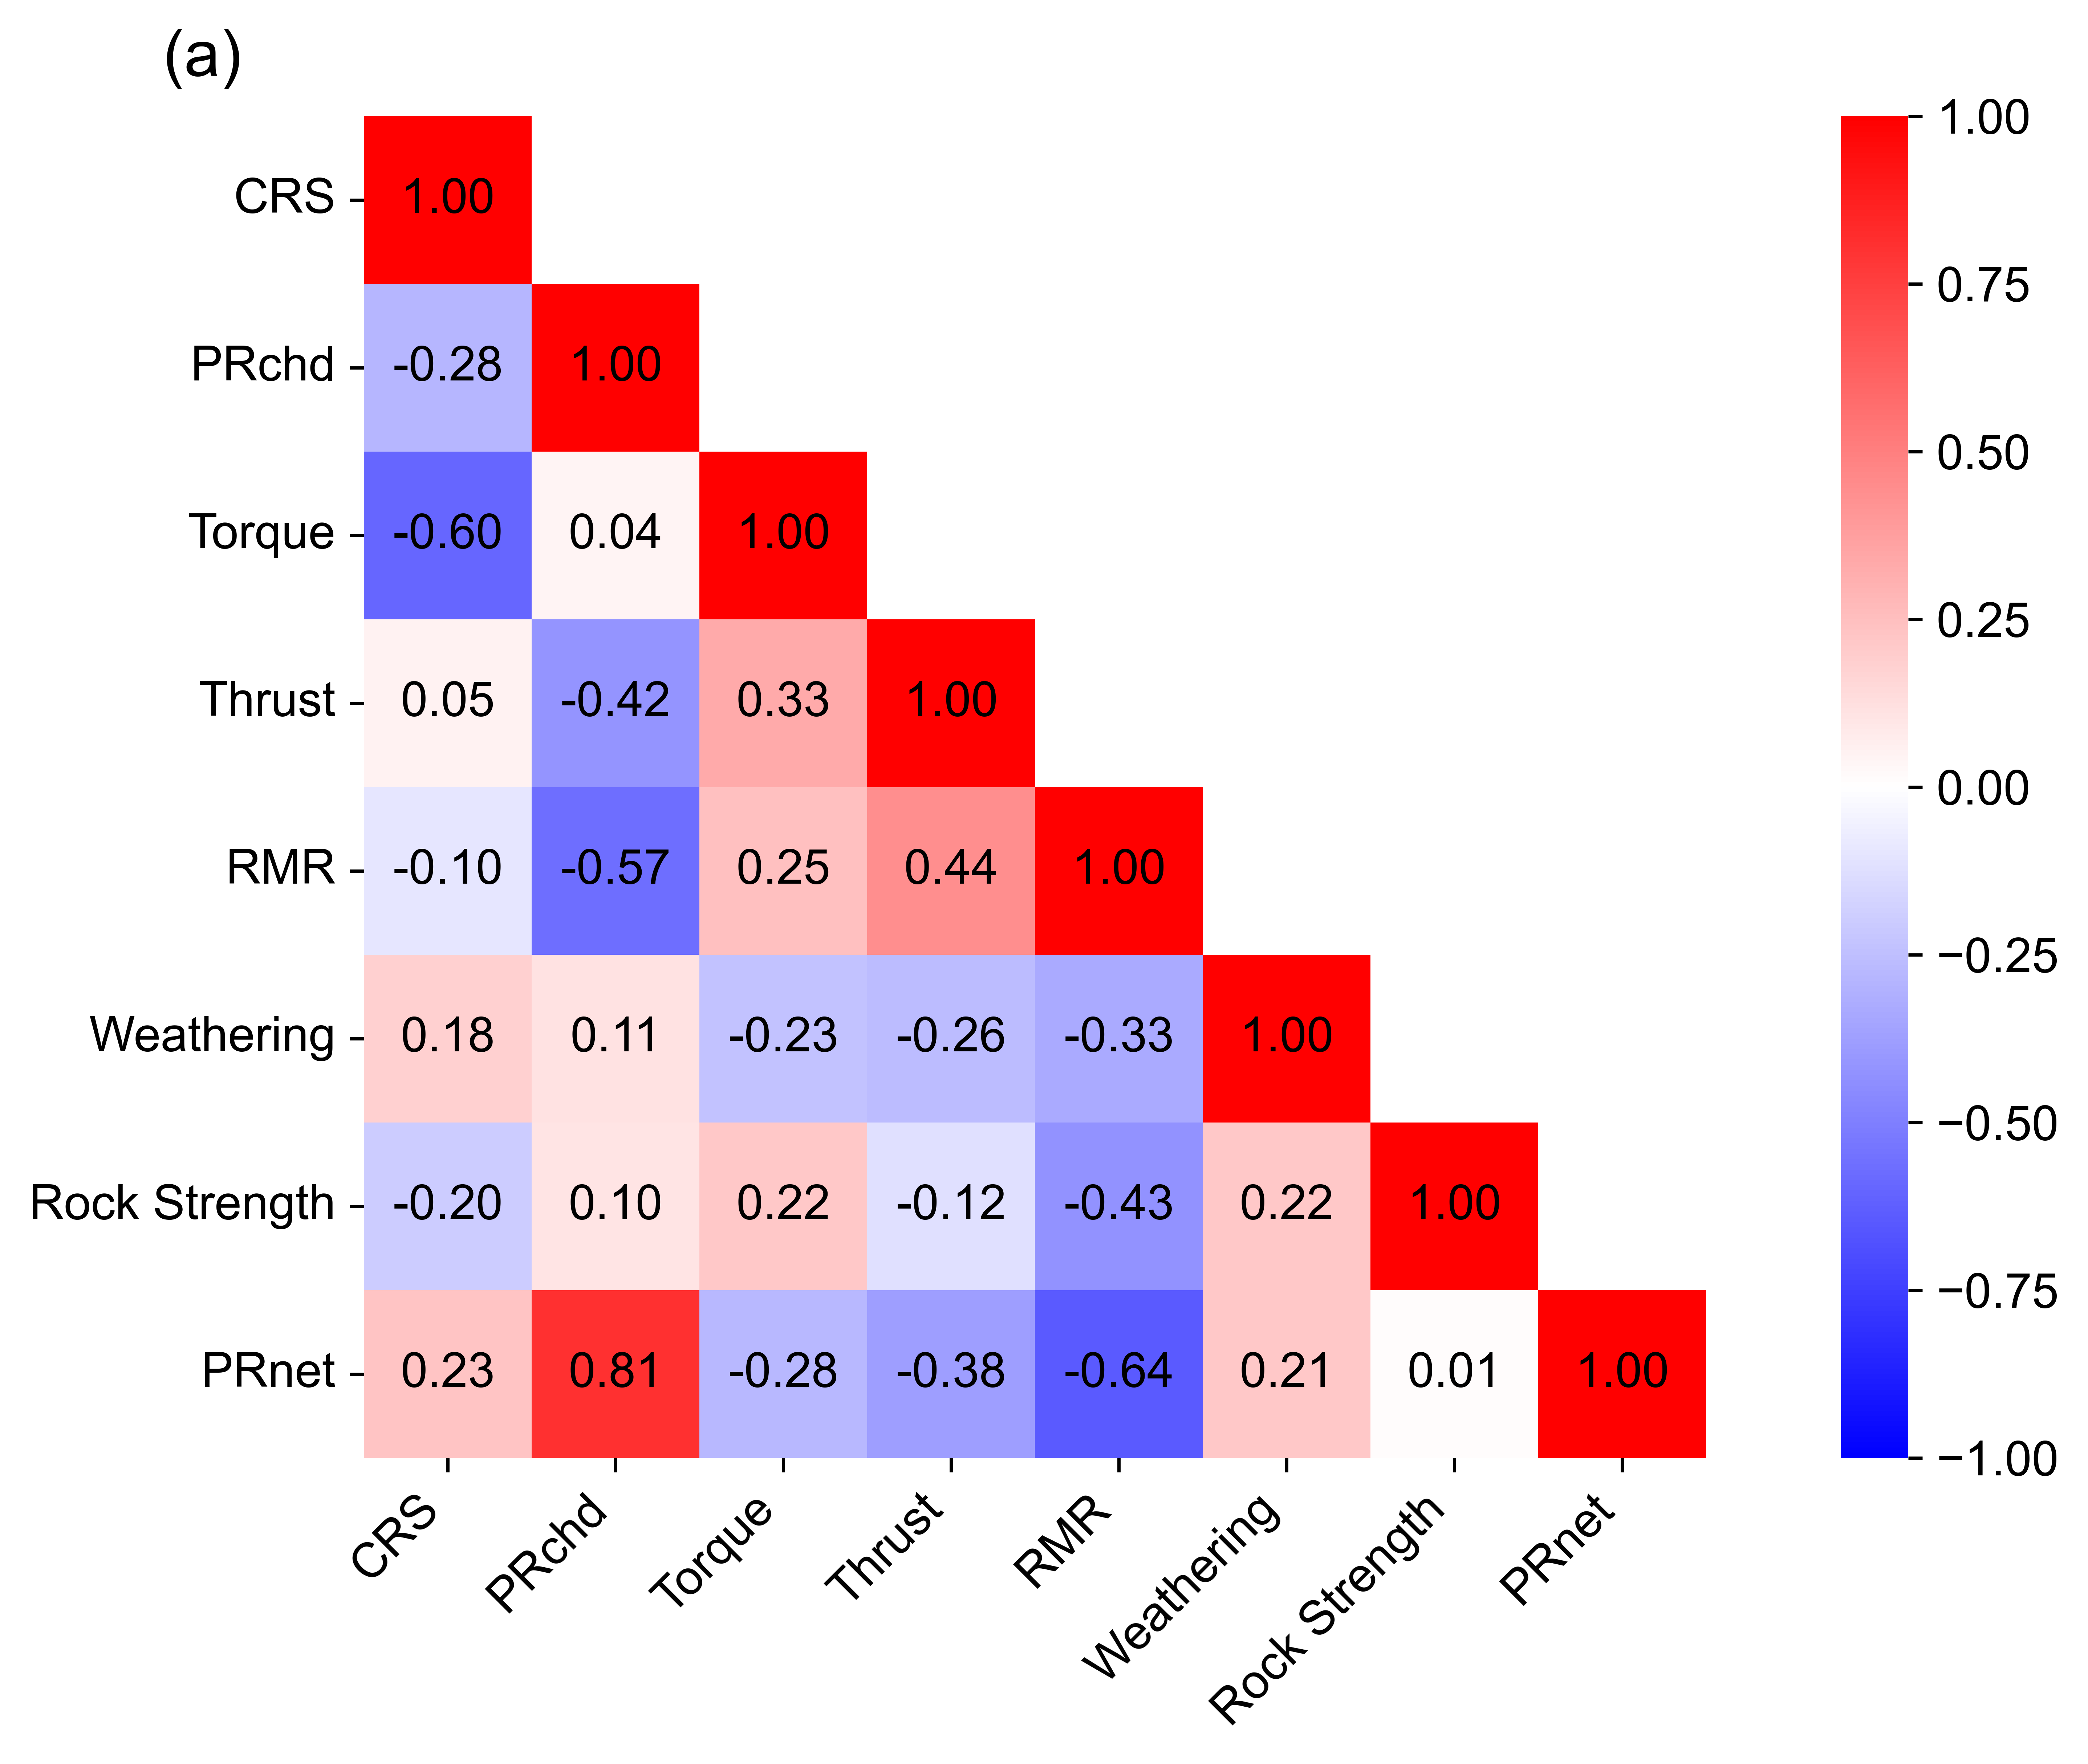

In [1]:
# Importing the Libraries
from matplotlib.colors import LinearSegmentedColormap
from sklearn.preprocessing import LabelEncoder

# Drop the columns you want to exclude
columns_to_exclude = ['Chainage', 'Ring No.','RMC', 'Lithology', 'Formation']
heat_filtered = df.drop(columns=columns_to_exclude)

# Encode the categorical columns using label encoding
label_encoder = LabelEncoder()
for column in ['Weathering', 'Rock Strength']:
    heat_filtered[column] = label_encoder.fit_transform(heat_filtered[column])

# Triangle Correlation Heatmap
plt.figure(figsize=(12, 6), dpi=800)
pyplot.rc('font', family='Arial')

# Compute the correlation matrix
corr_matrix = heat_filtered.corr(numeric_only=True)

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
np.fill_diagonal(mask, False)

# Custom annotation function
def annotate_heatmap(data, mask, fmt=".2f", **textkw):
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            if not mask[i, j]:
                plt.text(j + 0.5, i + 0.5, format(data[i, j], fmt), 
                         ha="center", va="center", **textkw)

# Create a custom diverging colormap: blue -> white -> red
custom_cmap = LinearSegmentedColormap.from_list(
    'custom_cmap',
    [(0.0, 'blue'), (0.5, 'white'), (1.0, 'red')]
)

# Plot the heatmap using the custom colormap
heatmap = sns.heatmap(corr_matrix, mask=mask, vmin=-1, vmax=1,
                      annot=False, cmap=custom_cmap, square=True)

# Manually annotate the heatmap
annotate_heatmap(corr_matrix.values, mask, fmt='.2f', fontsize=12, color='black')

# Set title with bold text
plt.text(
    x=-0.15,
    y=1.03,
    s="(a)",
    fontsize=16,
    transform=plt.gca().transAxes
)

# Customize axis labels
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha="right", size=12, color='black')
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=360, size=12, color='black')

# Customize ticks
plt.tick_params(axis='x', which='both', bottom=True, color='black')
plt.tick_params(axis='y', which='both', left=True, color='black')

# Customize colorbar
cbar = heatmap.collections[0].colorbar
cbar.ax.yaxis.set_tick_params(labelsize=12, colors='black')

# Save the figure
plt.savefig("a) correlation matrix for 'BBDM Project data.png", bbox_inches='tight', dpi=800)

# Show the plot
plt.show()

## Case B. SMDM Project

In [111]:
# load the dataset
df1 = pd.read_excel('Data from both TBM projects.xlsx', sheet_name='SMDMP')

In [113]:
# Display the first few rows to explore the dataset
df1.head()

Chainage  Ring No.  CRS  PRchd  Torque  Thrust  RMR RMC Lithology  \
0    40.500         1  5.0    8.0     415    4118   37  IV       SST   
1    47.858         2  4.5    7.3     387    5084   37  IV       SST   
2    52.626         3  5.0    7.1     586    7345   37  IV       SST   
3    53.334         4  5.5    7.8     407    6004   37  IV       SST   
4    53.341         5  4.5    7.9     460    7152   37  IV       SST   

  Formation Weathering Rock Strength  PRnet  
0      MS1A   MW to HW            MS   40.0  
1      MS1A   MW to HW            MS   32.4  
2      MS1A   MW to HW            MS   36.0  
3      MS1A   MW to HW            MS   42.8  
4      MS1A   MW to HW            MS   36.0

## Step 1: General information about the dataset

In [115]:
# Step 1: General information about the dataset
# Data types, non-null counts
print("General Information:")
print(df1.info())

General Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9470 entries, 0 to 9469
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Chainage       9470 non-null   float64
 1   Ring No.       9470 non-null   int64  
 2   CRS            9470 non-null   float64
 3   PRchd          9470 non-null   float64
 4   Torque         9470 non-null   int64  
 5   Thrust         9470 non-null   int64  
 6   RMR            9470 non-null   int64  
 7   RMC            9470 non-null   object 
 8   Lithology      9470 non-null   object 
 9   Formation      9470 non-null   object 
 10  Weathering     9470 non-null   object 
 11  Rock Strength  9470 non-null   object 
 12  PRnet          9470 non-null   float64
dtypes: float64(4), int64(4), object(5)
memory usage: 961.9+ KB
None


In [117]:
# Check for missing values
print("\nMissing Values:")
print(df1.isnull().sum())


Missing Values:
Chainage         0
Ring No.         0
CRS              0
PRchd            0
Torque           0
Thrust           0
RMR              0
RMC              0
Lithology        0
Formation        0
Weathering       0
Rock Strength    0
PRnet            0
dtype: int64


In [119]:
# Unique values per column
print("\nUnique Values per Column:")
print(df1.nunique())


Unique Values per Column:
Chainage         9470
Ring No.         9470
CRS                44
PRchd             147
Torque           1065
Thrust           4329
RMR                39
RMC                 3
Lithology          57
Formation          12
Weathering          5
Rock Strength       3
PRnet             676
dtype: int64


## Step 2: Descriptive statistics

In [121]:
df1.describe().round(2)

Chainage  Ring No.      CRS    PRchd   Torque    Thrust      RMR  \
count   9470.00   9470.00  9470.00  9470.00  9470.00   9470.00  9470.00   
mean    6699.58   4735.50     6.72     8.59   643.36   6838.91    39.73   
std     3839.02   2733.90     0.61     2.47   290.60   2145.76     9.96   
min       40.50      1.00     2.50     1.60    82.00   3067.00    16.00   
25%     3373.85   2368.25     6.50     7.10   387.00   5326.00    35.00   
50%     6702.25   4735.50     7.00     8.30   662.00   6264.00    39.00   
75%    10021.93   7102.75     7.00     9.90   891.00   7838.00    46.00   
max    13346.26   9470.00     9.00    18.80  4267.00  28300.00    60.00   

         PRnet  
count  9470.00  
mean     57.02  
std      15.21  
min       9.60  
25%      48.20  
50%      56.20  
75%      64.18  
max      99.70

### Step 3: Pearson Correlation Analysis

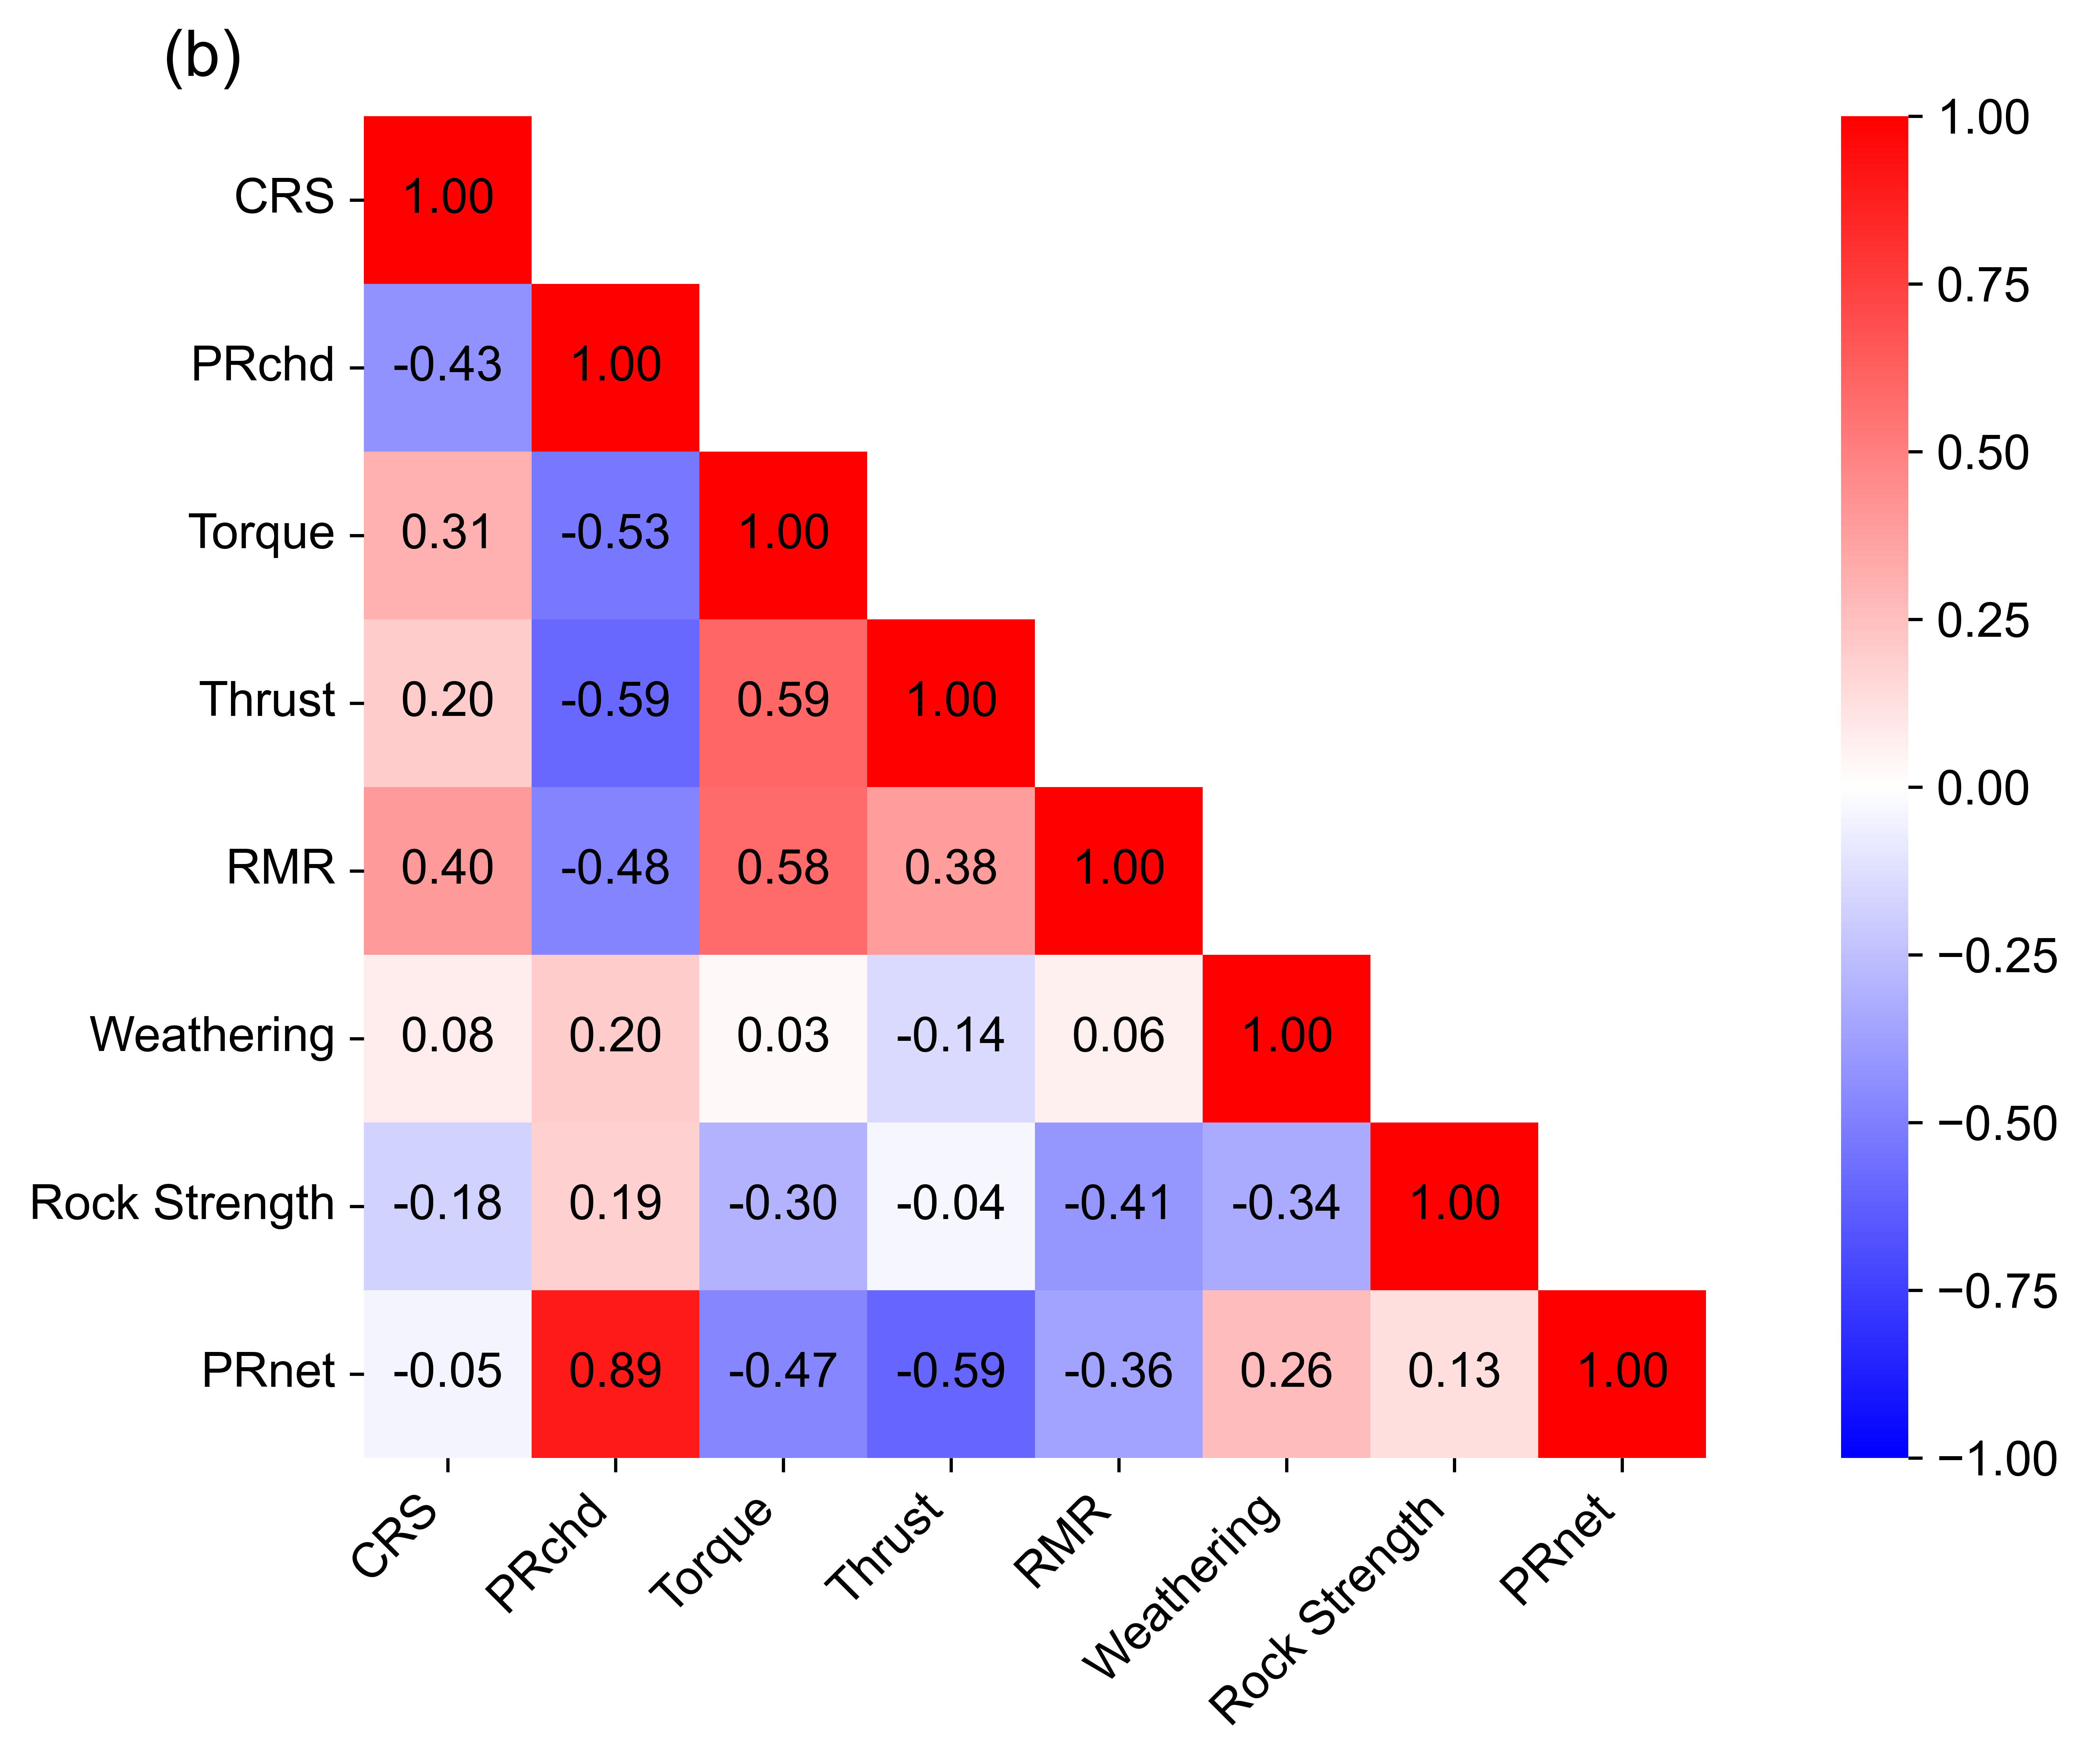

In [3]:
# Importing the Libraries
from matplotlib.colors import LinearSegmentedColormap
from sklearn.preprocessing import LabelEncoder

# Drop the columns you want to exclude
columns_to_exclude = ['Chainage', 'Ring No.', 'RMC', 'Lithology', 'Formation']
heat_filtered = df1.drop(columns=columns_to_exclude)

# Encode the categorical columns using label encoding
label_encoder = LabelEncoder()
for column in ['Weathering', 'Rock Strength']:
    heat_filtered[column] = label_encoder.fit_transform(heat_filtered[column])

# Triangle Correlation Heatmap
plt.figure(figsize=(12, 6), dpi=800)
pyplot.rc('font', family='Arial')

# Compute the correlation matrix
corr_matrix = heat_filtered.corr(numeric_only=True)

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
np.fill_diagonal(mask, False)

# Custom annotation function
def annotate_heatmap(data, mask, fmt=".2f", **textkw):
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            if not mask[i, j]:
                plt.text(j + 0.5, i + 0.5, format(data[i, j], fmt), 
                         ha="center", va="center", **textkw)

# Create a custom diverging colormap: blue -> white -> red
custom_cmap = LinearSegmentedColormap.from_list(
    'custom_cmap',
    [(0.0, 'blue'), (0.5, 'white'), (1.0, 'red')]
)

# Plot the heatmap without built-in annotations
heatmap = sns.heatmap(corr_matrix, mask=mask, vmin=-1, vmax=1,
                      annot=False, cmap=custom_cmap, square=True)

# Manually annotate the heatmap
annotate_heatmap(corr_matrix.values, mask, fmt='.2f', fontsize=12, color='black')

# Set title with bold text
plt.text(
    x=-0.15,
    y=1.03,
    s="(b)",
    fontsize=16,
    transform=plt.gca().transAxes
)

# Customize axis labels
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha="right", size=12, color='black')
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=360, size=12, color='black')

# Customize ticks
plt.tick_params(axis='x', which='both', bottom=True, color='black')
plt.tick_params(axis='y', which='both', left=True, color='black')

# Customize colorbar
cbar = heatmap.collections[0].colorbar
cbar.ax.yaxis.set_tick_params(labelsize=12, colors='black')

# Save the figure
plt.savefig("b) correlation matrix for 'SMDM Project data.png", bbox_inches='tight', dpi=800)

# Show the plot
plt.show()

## Step 4: Visualisation with Box–Whisker and Violin Plot fro_both projects

In [128]:
from matplotlib import colors as mcolors

df = pd.read_excel('Data from both TBM projects.xlsx', sheet_name='BBDMP')
df1 = pd.read_excel('Data from both TBM projects.xlsx', sheet_name='SMDMP')

# Add a new column to each dataframe to identify the source sheet
df['Source'] = 'BBDM Project'
df1['Source'] = 'SMDM Project'

# Combine both datasets into one for comparison
data_combined = pd.concat([df, df1])

#  Define the column names, units, and colors
columns = ["PRchd","CRS","RMR",  "Thrust", "Torque", "PRnet"]
colors_bbm = ["teal","blue",  "#00BFFF", "orange", "magenta", "green"]
colors_smdm = ["#66CDAA","#6495ED", "#B0E0E6",  "#FFDAB9","#FFB6C1", "#98FB98"]
units = ["[mm/rev]", "[rpm]", "[RMR]", "[kN]", "[kNm]", "[mm/min]"]


# Set font to Arial
plt.rcParams['font.family'] = 'Arial'

# Set up subplots as a 2x3 grid
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10), dpi=800)

# Flatten the 2D array of axes to make it easier to iterate through
axes = axes.flatten()

# Iterate through columns, units, and colors to create violin plots with box plots
for i, (column_name, unit, color_bbm, color_smdm) in enumerate(zip(columns, units, colors_bbm, colors_smdm)):
    if i < len(axes):
        # Create a violin plot comparing the two data sources
        sns.violinplot(x="Source", y=column_name, data=data_combined, inner="quartiles", 
                       showfliers=False, showextrema=False, quantiles=[0.25, 0.5, 0.75], 
                       ax=axes[i], palette=[color_bbm, color_smdm])
        
        # Create a separate box plot on a second y-axis
        ax2 = axes[i].twinx()
        sns.boxplot(x="Source", y=column_name, data=data_combined, color="black", 
                    width=0.2, ax=ax2, boxprops=dict(facecolor='none', edgecolor='black'), 
                    medianprops=dict(color='red'))
        ax2.set_yticks([])  # Hide y-axis ticks for the box plot

        # Remove the x-axis label (Source)
        axes[i].set_xlabel('')  # Remove x-axis label
        
        # Remove the y-axis label for the second axis (box plot)
        ax2.set_ylabel('')  # Remove y-axis label for box plot

        axes[i].set_title(column_name, fontsize=18)
        axes[i].set_ylabel(unit, fontsize=18)

        # Adjust the tick label size for both x and y axes
        axes[i].tick_params(axis='both', labelsize=18)

# Adjust layout
plt.tight_layout()

# Save the figure
plt.savefig('comparison_violin_box_plot.png', format='png', dpi=800)

# Show the plots
plt.show()

## Step 5: Weathering condition distribution

## (a) BBDM project

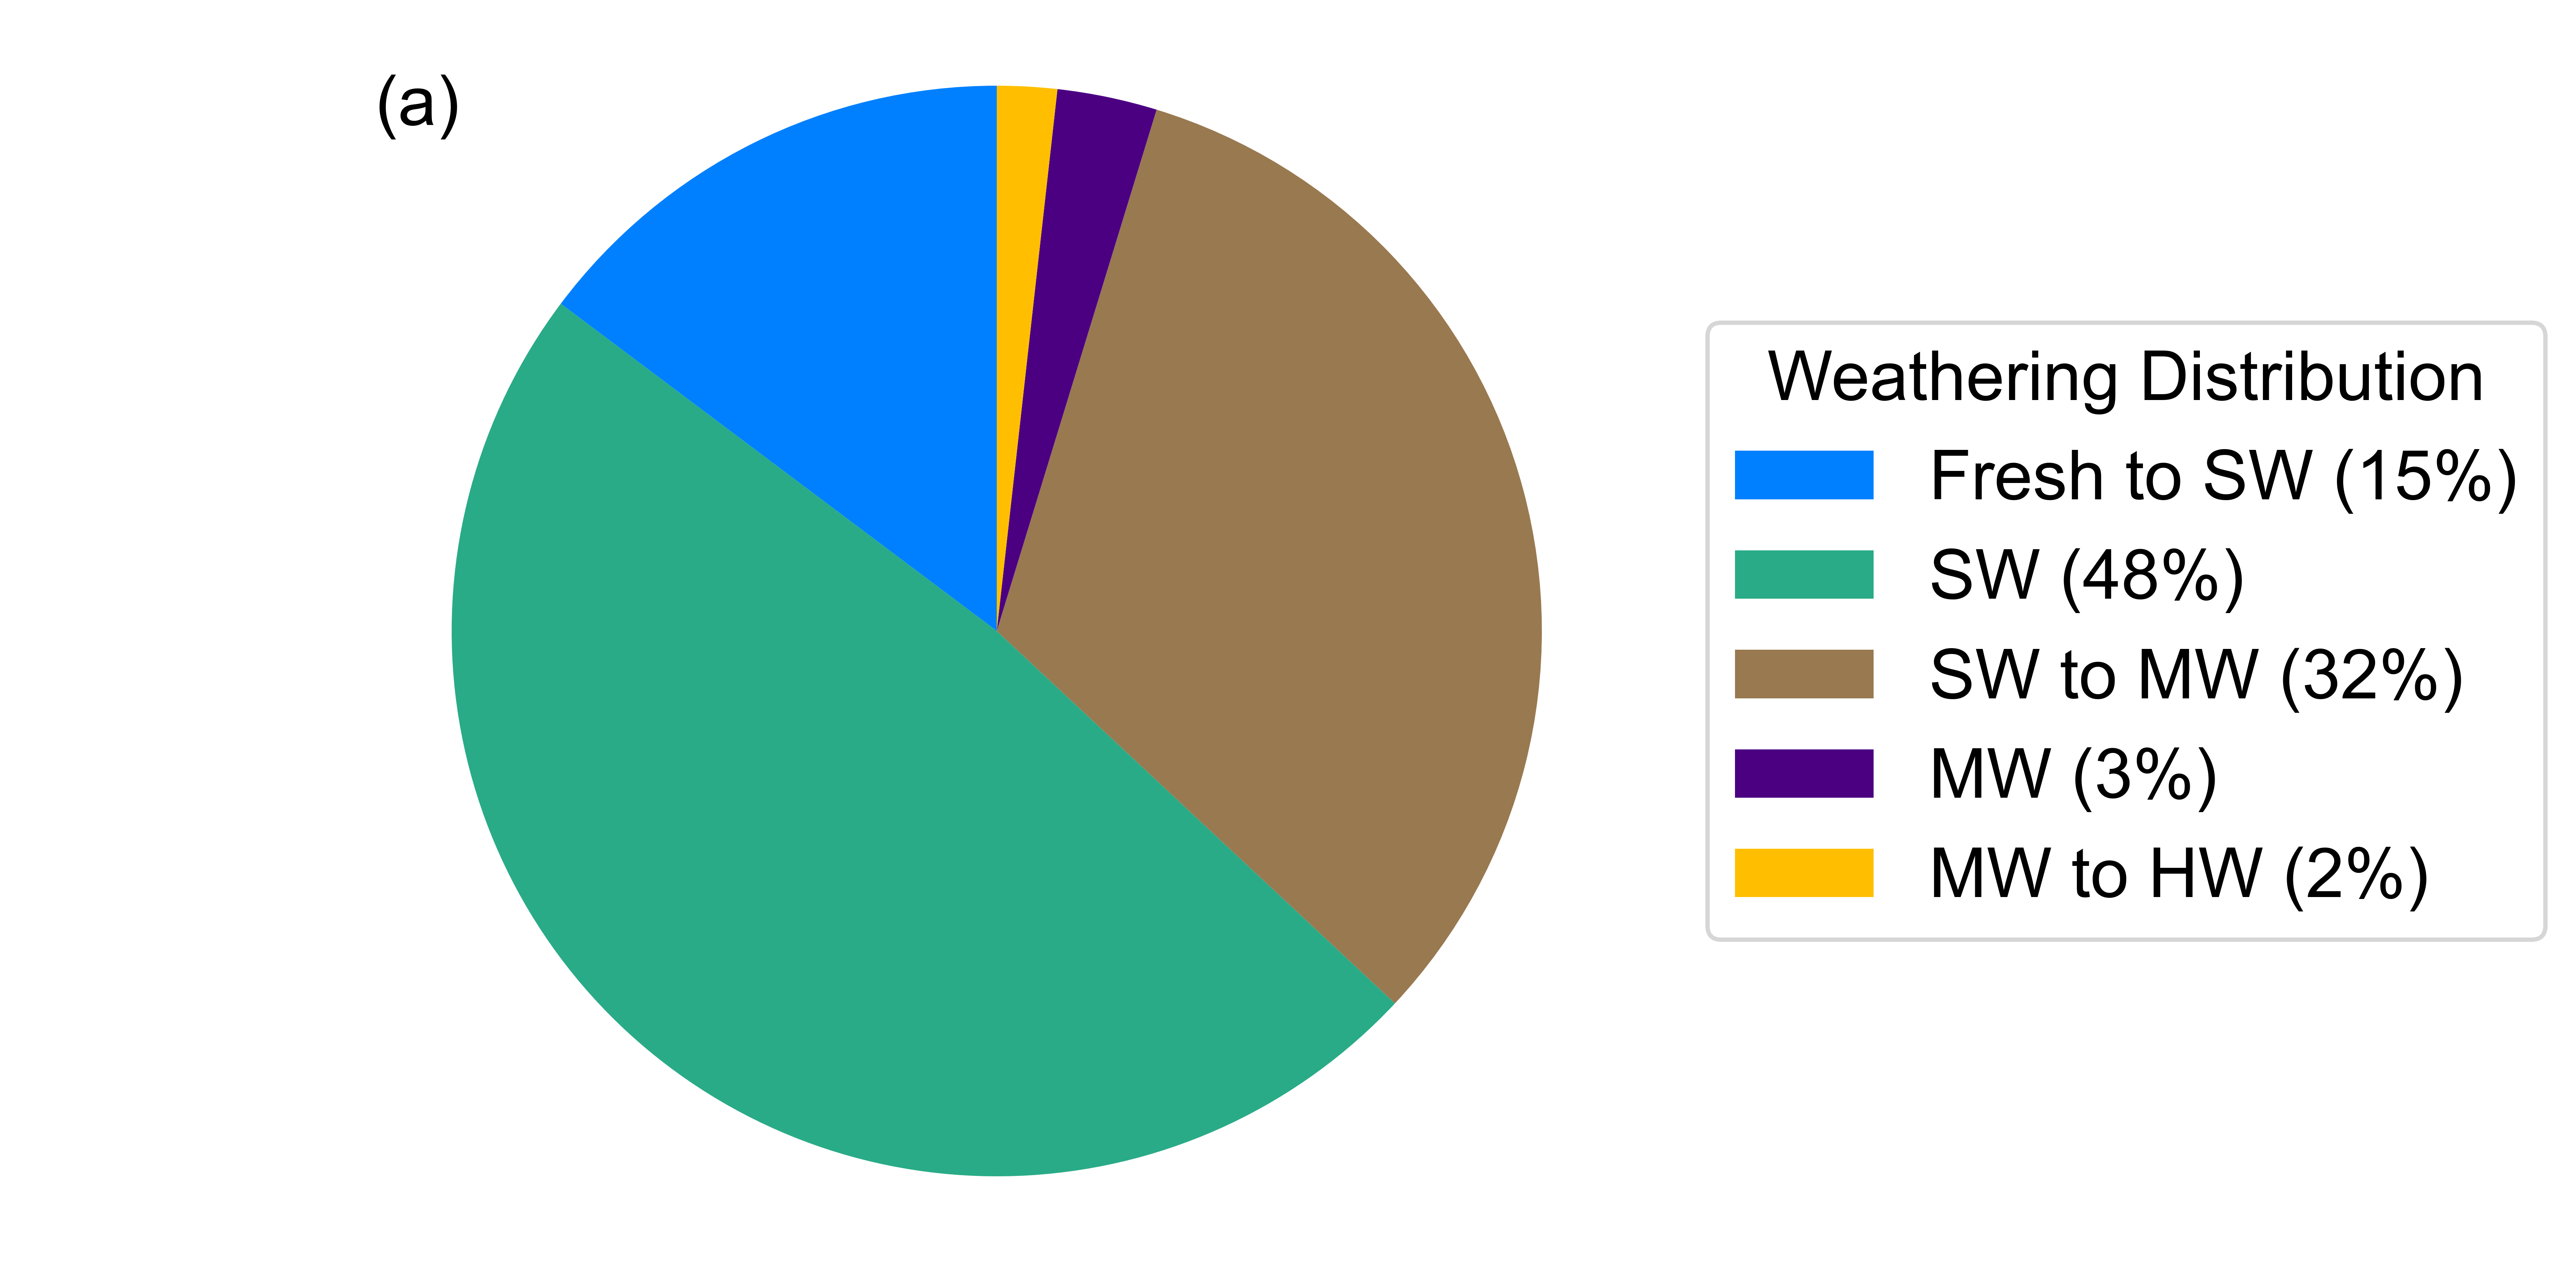

In [134]:
import matplotlib as mpl

# Set Arial font globally
mpl.rcParams['font.family'] = 'Arial'

# Calculate class counts
class_counts = df['Weathering'].value_counts()

# Calculate percentage for each class
total_count = class_counts.sum()
class_percentages = (class_counts / total_count) * 100

# Define the custom order and colors for the lithology classes
custom_order = ['Fresh to SW', 'SW','SW to MW', 'MW','MW to HW']
# Reorder the class percentages according to the custom order
class_percentages = class_percentages[custom_order]


custom_colors = {
    'Fresh to SW': '#0080FE',
    'SW': '#29AB87',
    'SW to MW': '#997950',
    'MW': 'indigo',
    'MW to HW': '#FFBF00'
}

# Set font to Arial
plt.rcParams['font.family'] = 'Arial'

# Set figure size
plt.figure(figsize=(8, 5), dpi=800)

# Combine class names with percentages for legend labels
legend_labels = [f"{class_name} ({percentage:.0f}%)"
                 for class_name, percentage in zip(class_percentages.index, class_percentages.values)]

# Plotting the pie chart without labels
colors = [custom_colors.get(key.strip(), 'gray') for key in class_percentages.index]  # Use gray as default if color not found
plt.pie(class_percentages, labels=None, startangle=90, colors=colors)

# Equal aspect ratio ensures that the pie is drawn as a circle
plt.axis('equal')

# Adding legend with custom labels
plt.legend(legend_labels, title="Weathering Distribution", loc="center left",
           bbox_to_anchor=(0.85, 0.5), fontsize=16, title_fontsize=16)

# Title of the plot
#plt.title("Distribution of Rock Mass Lithology", fontsize=16)

# Display the pie chart
plt.title('(a)', x=0.2,y=0.9, fontsize=16)
plt.savefig("a) weathering_distribution.png", bbox_inches='tight')
plt.show()

## (b) SMDM Project

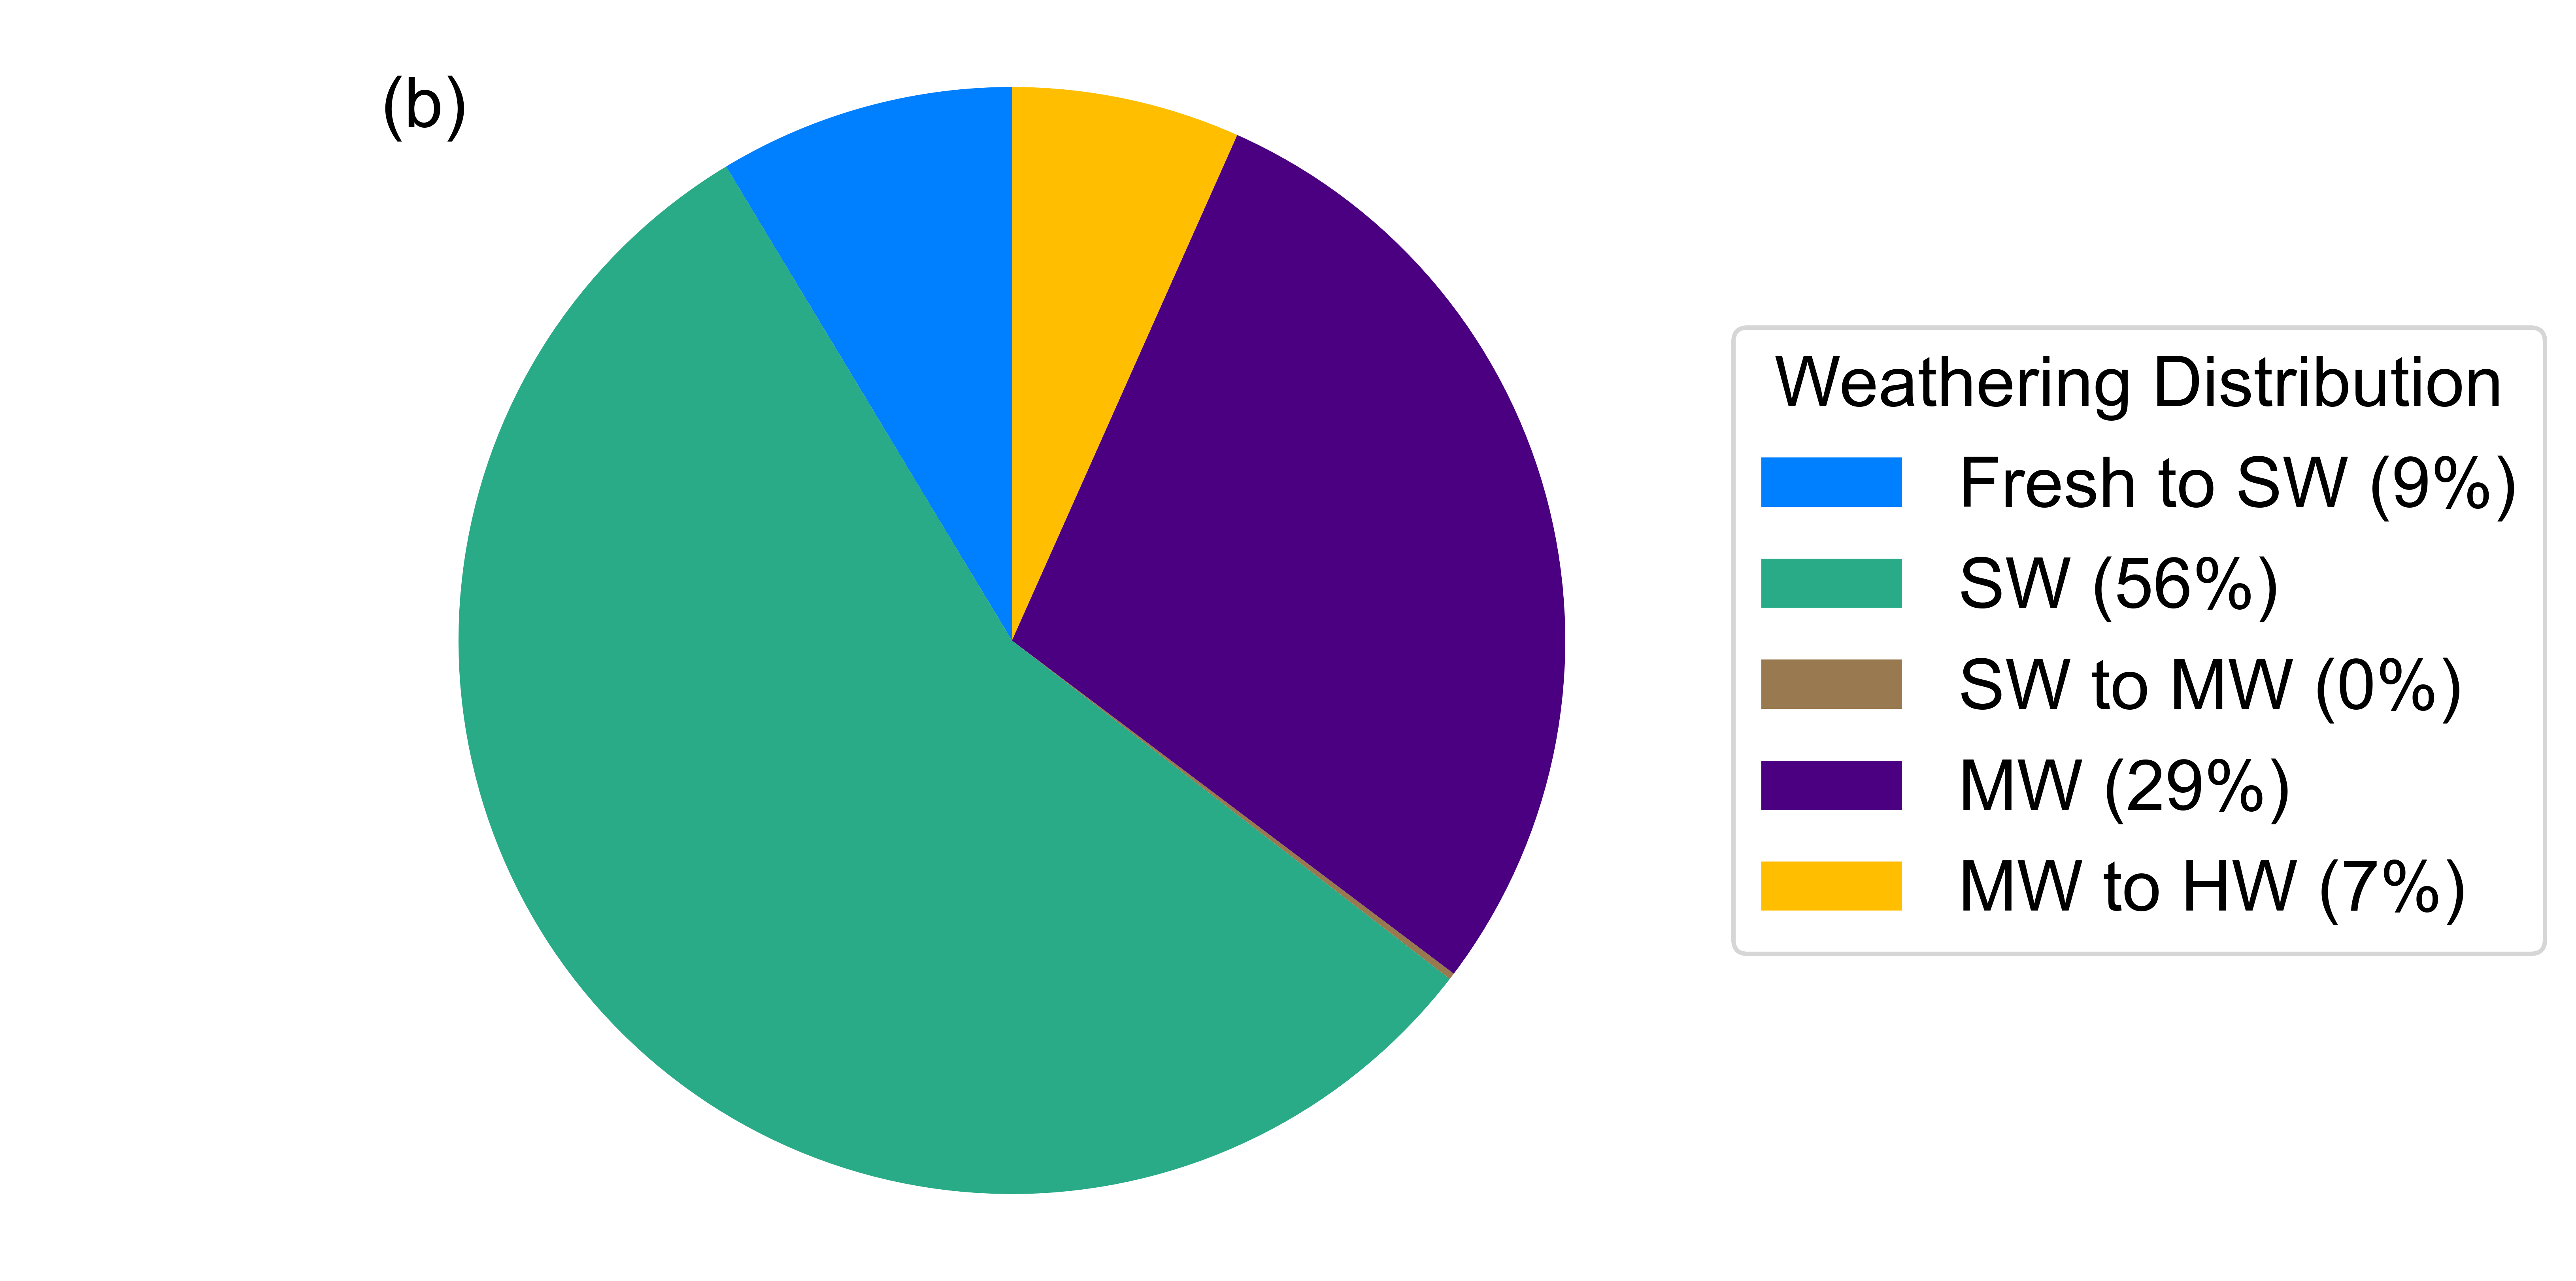

In [140]:
# Calculate class counts
class_counts = df1['Weathering'].value_counts()

# Calculate percentage for each class
total_count = class_counts.sum()
class_percentages = (class_counts / total_count) * 100

# Define the custom order and colors for the lithology classes
custom_order = ['Fresh to SW', 'SW','SW to MW', 'MW','MW to HW']
# Reorder the class percentages according to the custom order
class_percentages = class_percentages[custom_order]


custom_colors = {
    'Fresh to SW': '#0080FE',
    'SW': '#29AB87',
    'SW to MW': '#997950',
    'MW': 'indigo',
    'MW to HW': '#FFBF00'
}

# Set font to Arial
plt.rcParams['font.family'] = 'Arial'

# Set figure size
plt.figure(figsize=(8, 5), dpi=800)

# Combine class names with percentages for legend labels
legend_labels = [f"{class_name} ({percentage:.0f}%)"
                 for class_name, percentage in zip(class_percentages.index, class_percentages.values)]

# Plotting the pie chart without labels
colors = [custom_colors.get(key.strip(), 'gray') for key in class_percentages.index]  # Use gray as default if color not found
plt.pie(class_percentages, labels=None, startangle=90, colors=colors)

# Equal aspect ratio ensures that the pie is drawn as a circle
plt.axis('equal')

# Adding legend with custom labels
plt.legend(legend_labels, title="Weathering Distribution", loc="center left",
           bbox_to_anchor=(0.85, 0.5), fontsize=16, title_fontsize=16)

# Title of the plot
#plt.title("Distribution of Rock Mass Lithology", fontsize=16)

# Display the pie chart
plt.title('(b)', x=0.2,y=0.9, fontsize=16)
# Save the plot to a file
plt.savefig("b) weathering_distribution.png", bbox_inches='tight')
plt.show()

## Step 6: Rock strength condition distribution

## (a) BBDM project

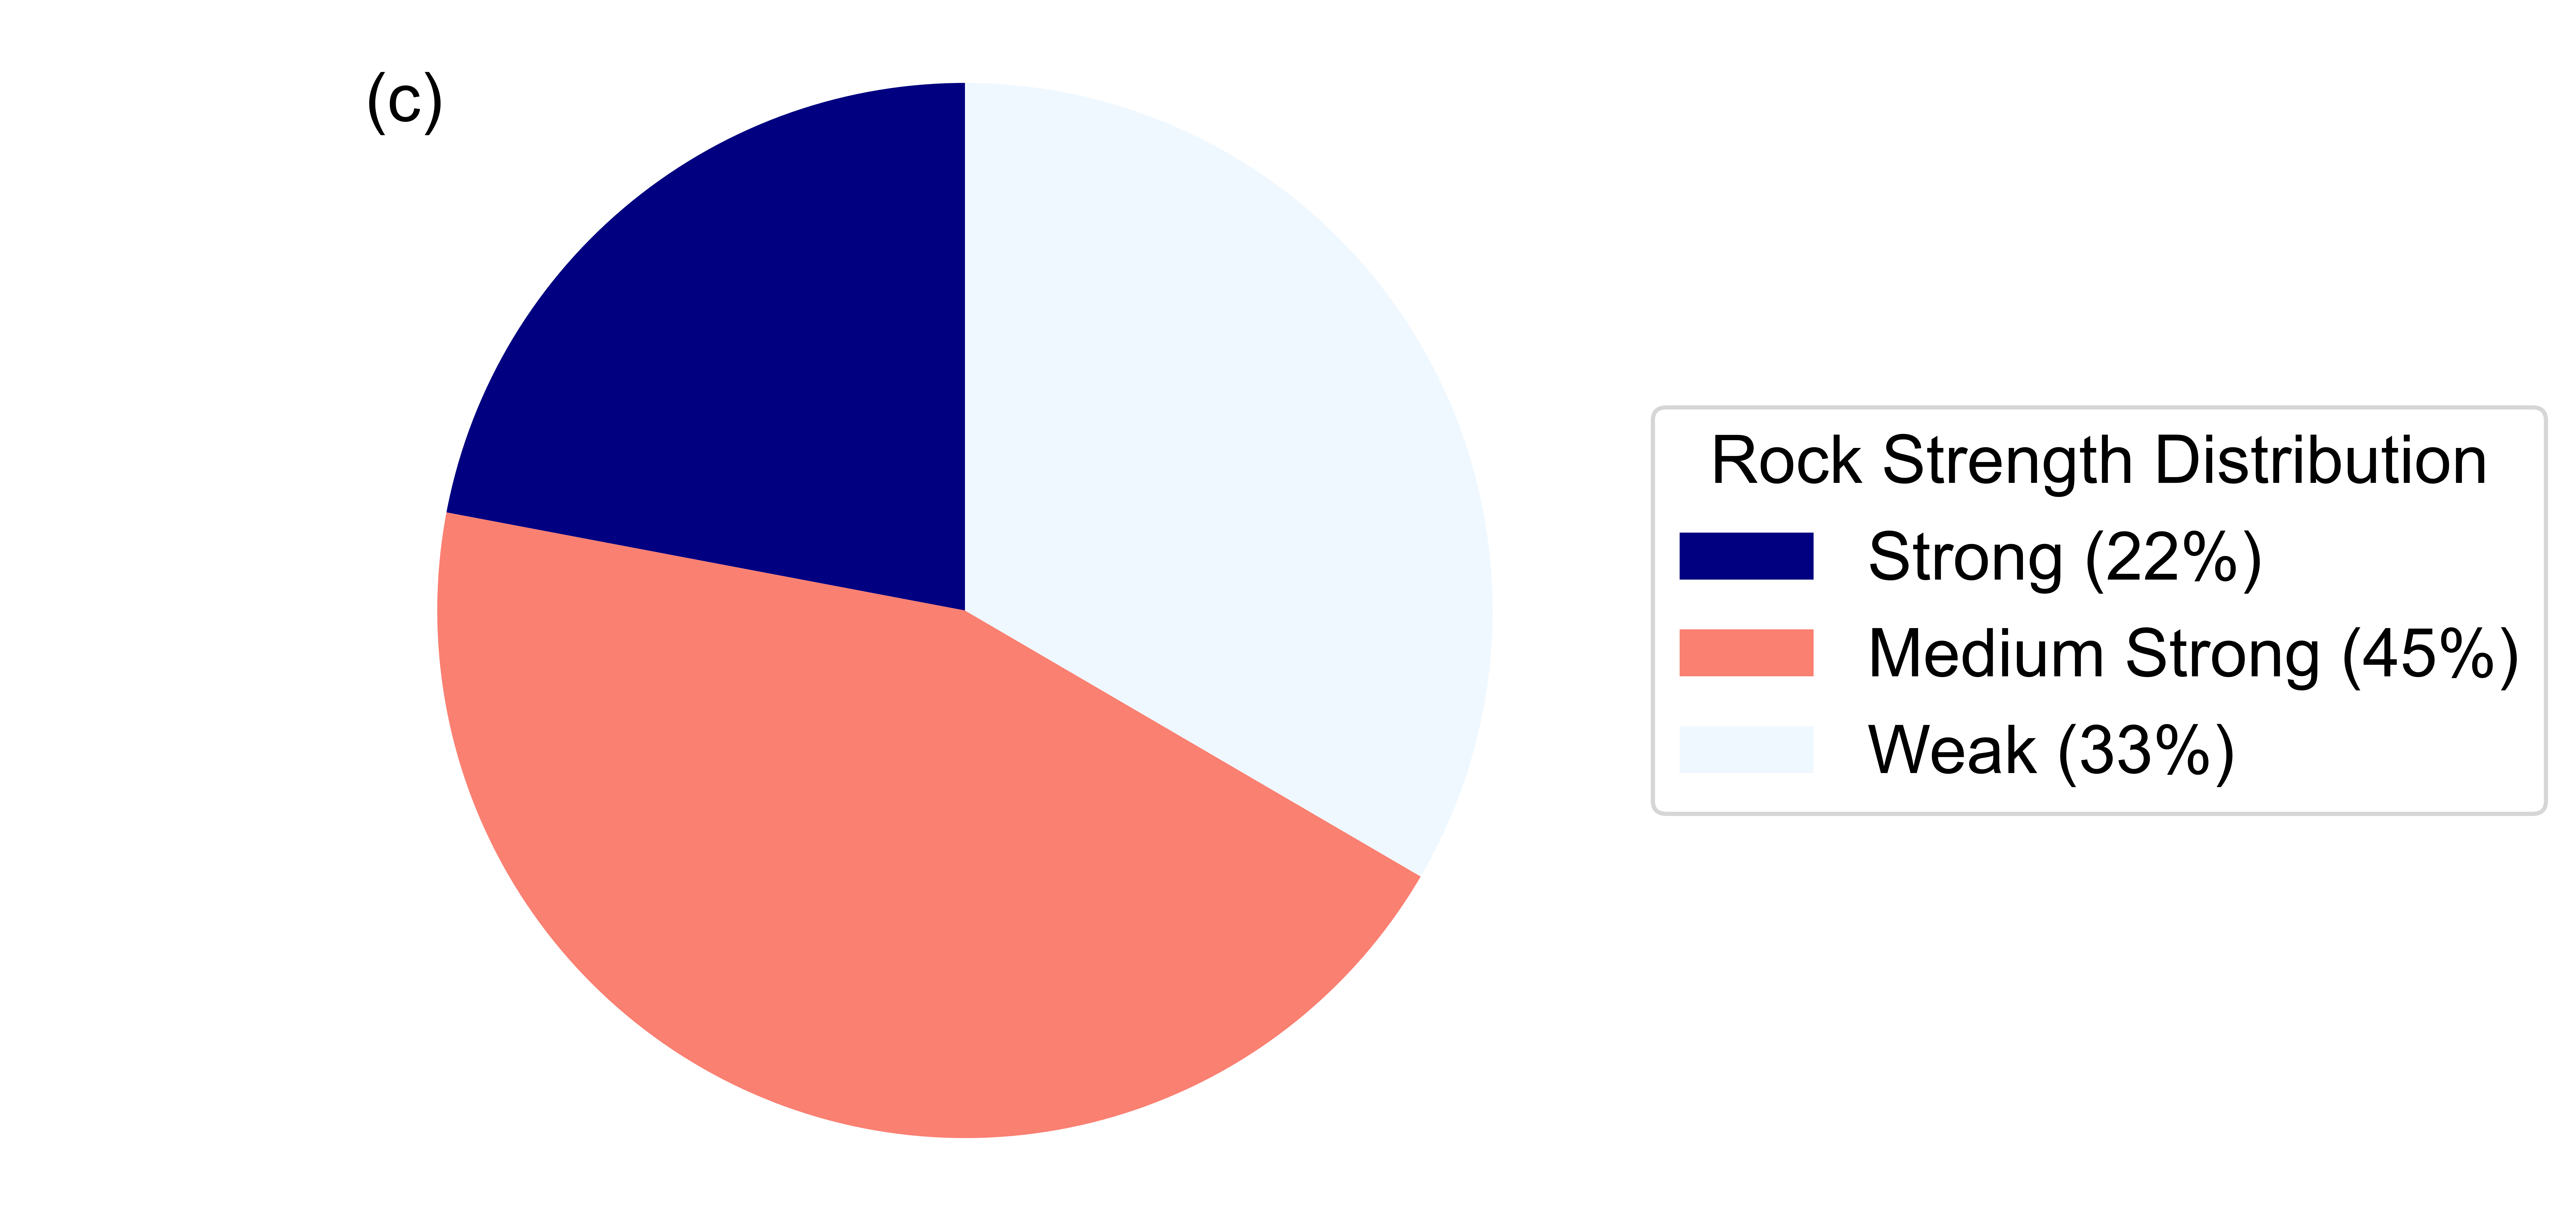

In [145]:
# Calculate class counts
class_counts = df['Rock Strength'].value_counts()

# Replace 'MS' with 'Medium Strong' for plotting purposes
class_counts.rename(index={'MS': 'Medium Strong'}, inplace=True)

# Calculate percentage for each class
total_count = class_counts.sum()
class_percentages = (class_counts / total_count) * 100

# Sort the lithology percentages in descending order
class_percentages = class_percentages.sort_values(ascending=False)

# Define the custom order and colors for the lithology classes
custom_order = ['Strong', 'Medium Strong', 'Weak']
# Reorder the class percentages according to the custom order
class_percentages = class_percentages[custom_order]

custom_colors = {
    'Strong': 'navy',
    'Medium Strong': 'salmon',
    'Weak': 'aliceblue'
}
# Set font to Arial
plt.rcParams['font.family'] = 'Arial'

# Set figure size
plt.figure(figsize=(8, 5), dpi=1200)

# Combine class names with percentages for legend labels
legend_labels = [f"{class_name} ({percentage:.0f}%)"
                 for class_name, percentage in zip(class_percentages.index, class_percentages.values)]

# Plotting the pie chart without labels
colors = [custom_colors.get(key.strip(), 'gray') for key in class_percentages.index]  # Use gray as default if color not found
plt.pie(class_percentages, labels=None, startangle=90, colors=colors)

# Equal aspect ratio ensures that the pie is drawn as a circle
plt.axis('equal')

# Adding legend with custom labels
plt.legend(legend_labels, title="Rock Strength Distribution", loc="center left",
           bbox_to_anchor=(0.85, 0.5), fontsize=16, title_fontsize=16)

# Title of the plot
#plt.title("Distribution of Rock Mass Lithology", fontsize=16)

# Display the pie chart
plt.title('(c)', x=0.2,y=0.9, fontsize=16)
# Save the plot to a file
plt.savefig("c) Rock Strength_distribution.png", bbox_inches='tight')
plt.show()

## (b) SMDM project

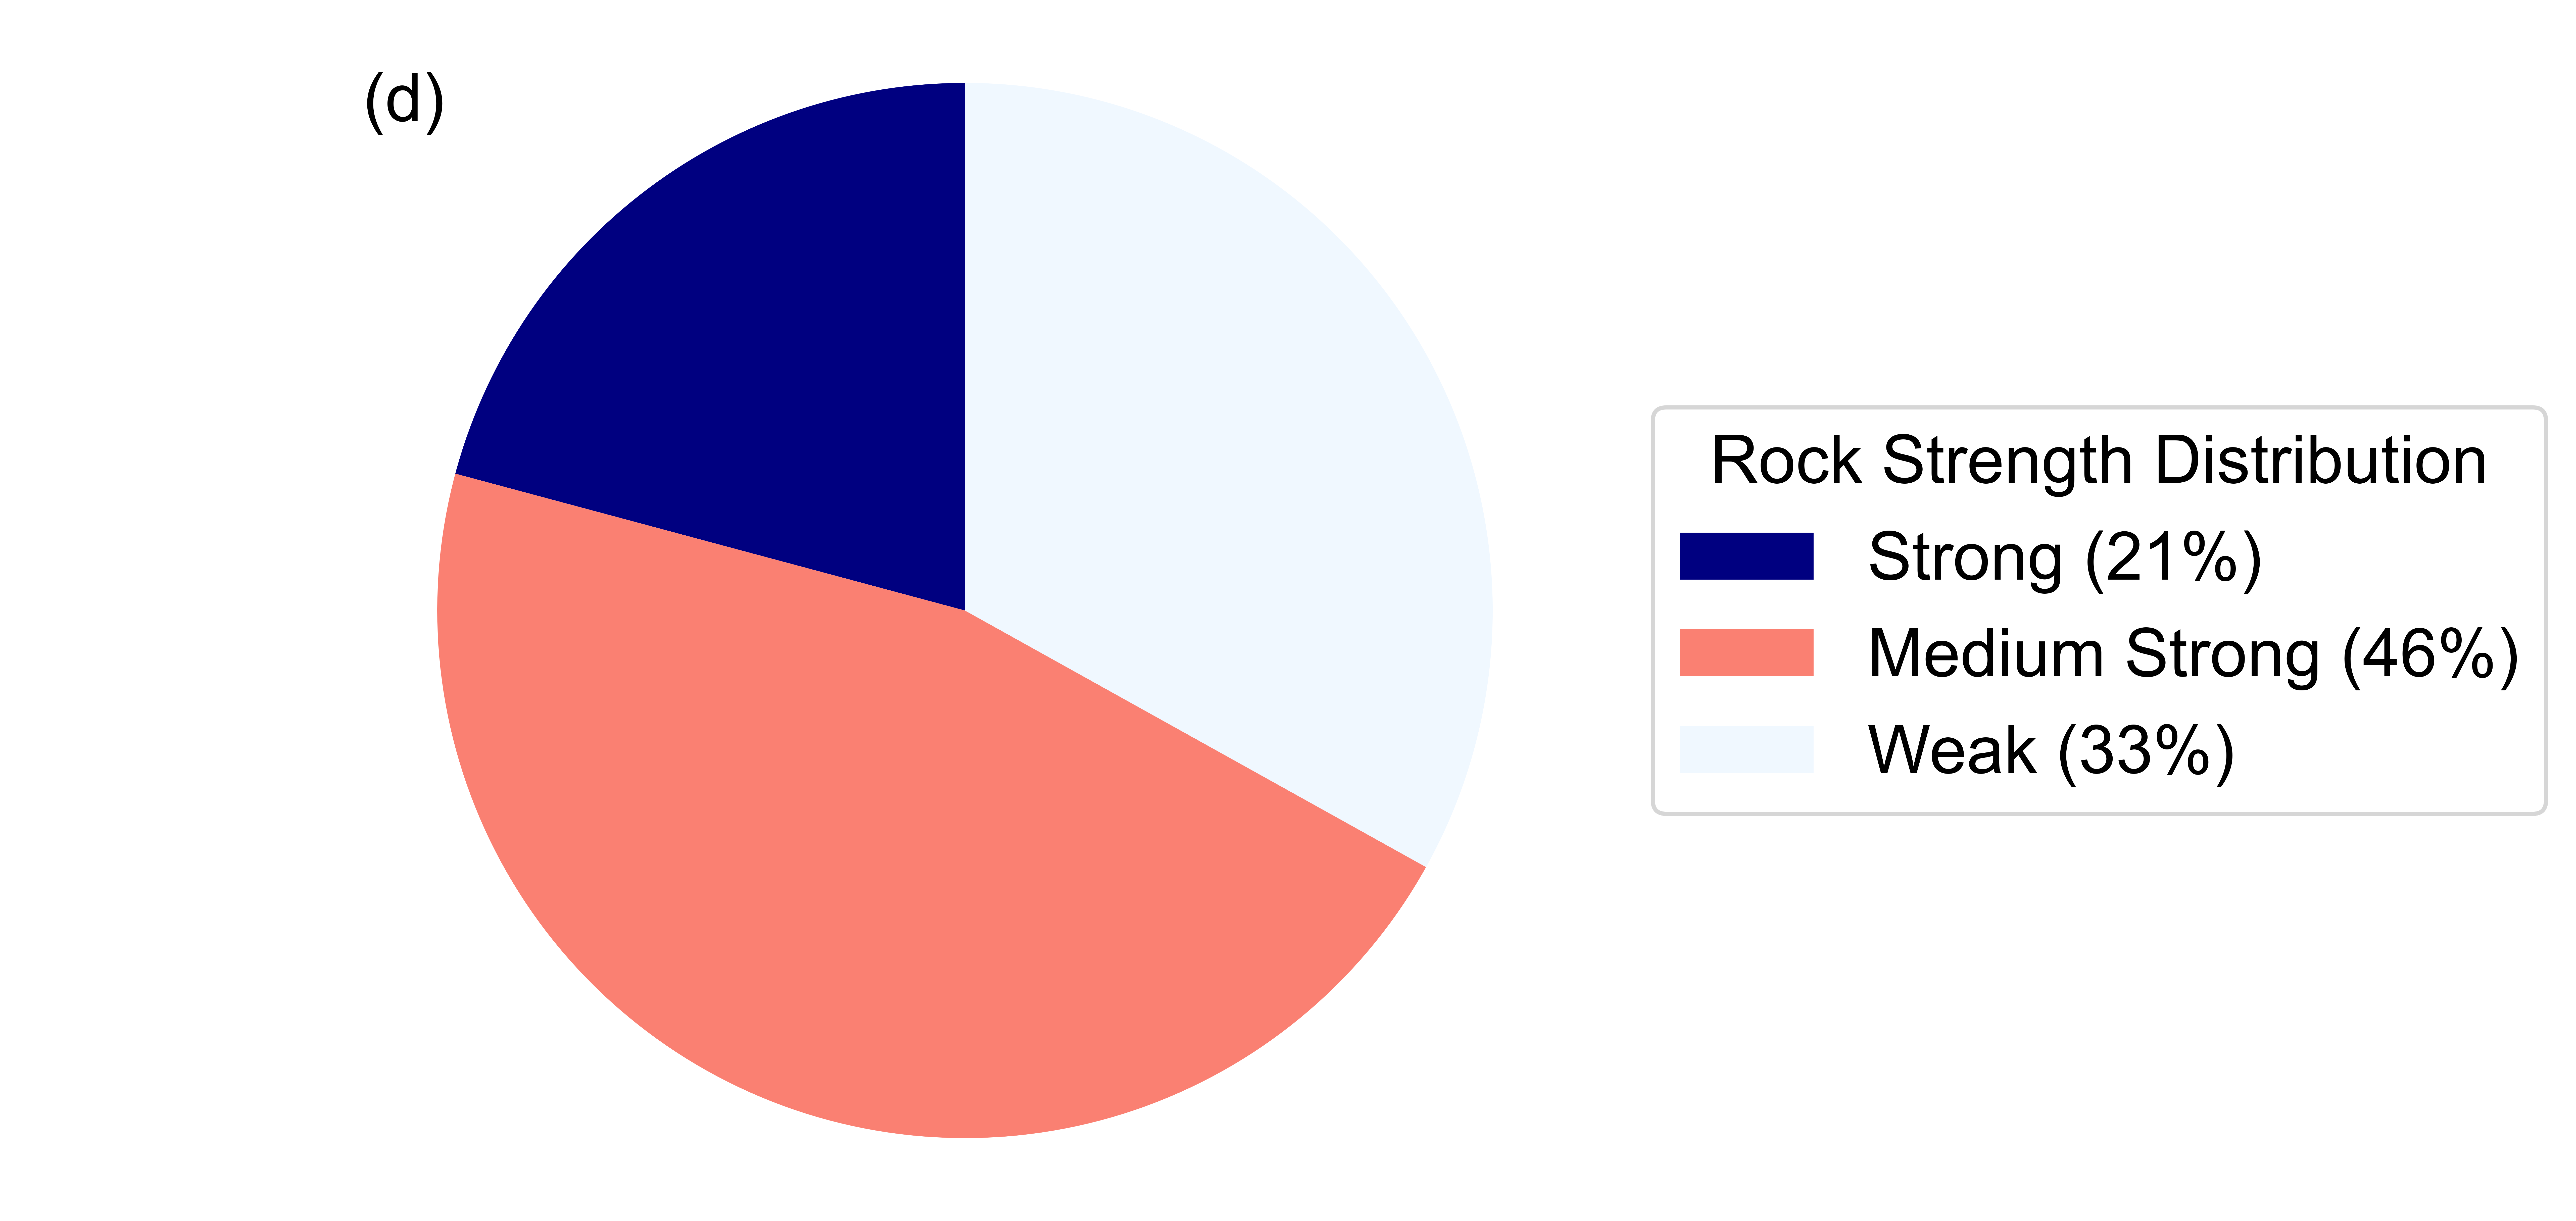

In [147]:
# Calculate class counts
class_counts = df1['Rock Strength'].value_counts()

# Replace 'MS' with 'Medium Strong' for plotting purposes
class_counts.rename(index={'MS': 'Medium Strong'}, inplace=True)

# Calculate percentage for each class
total_count = class_counts.sum()
class_percentages = (class_counts / total_count) * 100

# Sort the lithology percentages in descending order
class_percentages = class_percentages.sort_values(ascending=False)

# Define the custom order and colors for the lithology classes
custom_order = ['Strong', 'Medium Strong', 'Weak']
# Reorder the class percentages according to the custom order
class_percentages = class_percentages[custom_order]

custom_colors = {
    'Strong': 'navy',
    'Medium Strong': 'salmon',
    'Weak': 'aliceblue'
}
# Set font to Arial
plt.rcParams['font.family'] = 'Arial'

# Set figure size
plt.figure(figsize=(8, 5), dpi=1200)

# Combine class names with percentages for legend labels
legend_labels = [f"{class_name} ({percentage:.0f}%)"
                 for class_name, percentage in zip(class_percentages.index, class_percentages.values)]

# Plotting the pie chart without labels
colors = [custom_colors.get(key.strip(), 'gray') for key in class_percentages.index]  # Use gray as default if color not found
plt.pie(class_percentages, labels=None, startangle=90, colors=colors)

# Equal aspect ratio ensures that the pie is drawn as a circle
plt.axis('equal')

# Adding legend with custom labels
plt.legend(legend_labels, title="Rock Strength Distribution", loc="center left",
           bbox_to_anchor=(0.85, 0.5), fontsize=16, title_fontsize=16)

# Title of the plot
#plt.title("Distribution of Rock Mass Lithology", fontsize=16)

# Display the pie chart
plt.title('(d)', x=0.2,y=0.9, fontsize=16)
# Save the plot to a file
plt.savefig("d) Rock Strength_distribution.png", bbox_inches='tight')
plt.show()